In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import linear_model

## https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
## https://medium.com/data-hackers/implementando-regress%C3%A3o-linear-simples-em-python-91df53b920a8
import statsmodels.api as sm

import math

In [2]:
dftrain = pd.read_csv('.\\testfiles\\train.csv')
dftest = pd.read_csv('.\\testfiles\\test.csv')

dftrain = dftrain.drop(['Unnamed: 0', 'NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA','CO_PROVA_CN', 'CO_PROVA_CH','Q027'],axis=1)
                        #'CO_PROVA_LC', 'Q027'], axis=1)

answer = pd.DataFrame()
answer['NU_INSCRICAO'] = dftest['NU_INSCRICAO']
dftest = dftest.drop(['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'CO_PROVA_CN', 'CO_PROVA_CH', 'Q027'], axis=1)

In [3]:
print(list(dftest.columns))
print('Columns test: '+str(len(dftest.columns)))
print('')
cols = list(set(dftrain.columns).intersection(set(dftest.columns)))
cols.append('NU_NOTA_MT')
cols.append('TP_PRESENCA_MT')

dftrain = dftrain[cols]
dftest['TP_PRESENCA_MT'] = dftest['TP_PRESENCA_LC']

['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']
Columns test: 42



In [4]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 43 columns):
CO_UF_RESIDENCIA          4576 non-null int64
NU_IDADE                  4576 non-null int64
TP_SEXO                   4576 non-null object
TP_COR_RACA               4576 non-null int64
TP_NACIONALIDADE          4576 non-null int64
TP_ST_CONCLUSAO           4576 non-null int64
TP_ANO_CONCLUIU           4576 non-null int64
TP_ESCOLA                 4576 non-null int64
TP_ENSINO                 1480 non-null float64
IN_TREINEIRO              4576 non-null int64
TP_DEPENDENCIA_ADM_ESC    1480 non-null float64
IN_BAIXA_VISAO            4576 non-null int64
IN_CEGUEIRA               4576 non-null int64
IN_SURDEZ                 4576 non-null int64
IN_DISLEXIA               4576 non-null int64
IN_DISCALCULIA            4576 non-null int64
IN_SABATISTA              4576 non-null int64
IN_GESTANTE               4576 non-null int64
IN_IDOSO                  4576 non-null int64
TP_PRESENCA_CN

In [5]:
dftest.select_dtypes(['object']).columns

Index(['TP_SEXO', 'CO_PROVA_LC', 'CO_PROVA_MT', 'Q001', 'Q002', 'Q006', 'Q024',
       'Q025', 'Q026', 'Q047'],
      dtype='object')

In [6]:
dftrain[['Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 7 columns):
Q001    13730 non-null object
Q002    13730 non-null object
Q006    13730 non-null object
Q024    13730 non-null object
Q025    13730 non-null object
Q026    13730 non-null object
Q047    13730 non-null object
dtypes: object(7)
memory usage: 750.9+ KB


In [7]:
train_dummy = pd.get_dummies(dftrain[dftrain.select_dtypes(['object']).columns])
test_dummy = pd.get_dummies(dftest[dftest.select_dtypes(['object']).columns])

In [8]:
dftrain = pd.concat([dftrain, train_dummy], axis = 1)
dftest =  pd.concat([dftest, test_dummy], axis = 1)

dftrain.drop(dftrain.select_dtypes(['object']).columns, axis=1, inplace=True)
dftest.drop(dftest.select_dtypes(['object']).columns, axis=1, inplace=True)

dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Columns: 101 entries, CO_UF_RESIDENCIA to Q047_E
dtypes: float64(12), int64(21), uint8(68)
memory usage: 1.4 MB


In [9]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 102 entries, IN_DISLEXIA to TP_SEXO_M
dtypes: float64(13), int64(21), uint8(68)
memory usage: 4.5 MB


In [10]:
def correlations_plot(dataframe, corr_columns):
    dfcorr = dataframe.loc[:, corr_columns]
    corr = dfcorr.corr()

    plt.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar()
    plt.show()

def classificationTP_SEXO(dataframe):
    dataframe['TP_SEXO'] = dataframe['TP_SEXO'].apply(lambda c: 1 if c == 'M' else 2)

def classificationCO_PROVA_MT(dataframe):
    column_class = list(dataframe.CO_PROVA_MT.unique())
    dataframe['CO_PROVA_MT_CLASS'] = dataframe['CO_PROVA_MT'].apply(lambda x: column_class.index(x)+1)
    
def classificationCO_PROVA(dataframe, base, column):
    new_dataframe = dataframe[[base, column]].copy()
    new_dataframe = new_dataframe.sort_values(by=[column])
    
    dfresult = pd.DataFrame()
    dfresult['KEY'] = new_dataframe[column].unique()
    dfresult['MEAN'] = list(new_dataframe.groupby(column)[base].mean())
    dfresult.MEAN.fillna(0, inplace=True)
    
    column_class = list(dfresult['KEY'].unique())

    dataframe[column+'_CLASS'] = dataframe[column].apply(lambda x: column_class.index(x)+1)
    
def classification(x):
    if x == 'A':
        return 1
    elif x == 'B':
        return 2
    elif x == 'C':
        return 3
    elif x == 'D':
        return 4
    elif x == 'E':
        return 5
    elif x == 'F':
        return 6
    elif x == 'G':
        return 7
    elif x == 'H':
        return 8
    elif x == 'I':
        return 9
    elif x == 'J':
        return 10
    elif x == 'K':
        return 11
    elif x == 'L':
        return 12
    elif x == 'M':
        return 13
    elif x == 'N':
        return 14
    elif x == 'O':
        return 15
    elif x == 'P':
        return 16
    elif x == 'Q':
        return 17
    
    return 0
    
def fillTP_DEPENDENCIA_ADM_ESC(dataframe):
    for idx in range(len(dataframe)):
        if math.isnan(dataframe.TP_DEPENDENCIA_ADM_ESC.iloc[idx]):
            if dataframe.TP_ESCOLA.iloc[idx] == 1 and (dataframe.Q047_D.iloc[idx] == 1 or dataframe.Q047_E.iloc[idx] == 1):
                dataframe.iloc[idx, dataframe.columns.get_loc('TP_DEPENDENCIA_ADM_ESC')] = 4
            elif dataframe.TP_ESCOLA.iloc[idx] == 1 and (dataframe.Q047_D.iloc[idx] != 1 and dataframe.Q047_E.iloc[idx] != 1):
                dataframe.iloc[idx, dataframe.columns.get_loc('TP_DEPENDENCIA_ADM_ESC')] = 2
            elif dataframe.TP_ESCOLA.iloc[idx] == 4:
                dataframe.iloc[idx, dataframe.columns.get_loc('TP_DEPENDENCIA_ADM_ESC')] = 4
                
    dataframe.TP_DEPENDENCIA_ADM_ESC.fillna(dataframe.TP_DEPENDENCIA_ADM_ESC.mode(), inplace=True)

def presenca_geral(dataframe):
    dataframe['PRESENCA_GERAL'] = 0
    dataframe.loc[(cdf['TP_PRESENCA_MT']==1) & 
        (dataframe['TP_PRESENCA_CN']==1) & 
        (dataframe['TP_PRESENCA_CH']==1) & 
        (dataframe['TP_PRESENCA_LC']==1), 'PRESENCA_GERAL'] = 1
    
def clear_data(dataframe, dfcolumns):
    new_dataFrame = pd.DataFrame()
    
    new_dataFrame = dataframe[dfcolumns].copy()
    
    return new_dataFrame
        
    
def preprocess_data_corr(dataframe, execution_train):
    for idx in range(len(dataframe)):
        if dataframe.TP_PRESENCA_MT.iloc[idx] != 1:
            if execution_train:
                dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_MT')] = 0
            dataframe.iloc[idx, dataframe.columns.get_loc('TP_PRESENCA_MT')] = 0
            
        if dataframe.TP_PRESENCA_LC.iloc[idx] != 1:
            dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_LC')] = 0
            dataframe.iloc[idx, dataframe.columns.get_loc('TP_PRESENCA_LC')] = 0
        
        if dataframe.TP_PRESENCA_CN.iloc[idx] != 1:
            dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_CN')] = 0
            dataframe.iloc[idx, dataframe.columns.get_loc('TP_PRESENCA_CN')] = 0
            
        if dataframe.TP_PRESENCA_CH.iloc[idx] != 1:
            dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_CH')] = 0
            dataframe.iloc[idx, dataframe.columns.get_loc('TP_PRESENCA_CH')] = 0
        
            
        if dataframe.TP_STATUS_REDACAO.iloc[idx] != 1:
            dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_REDACAO')] = 0
            dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_COMP1')] = 0
            dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_COMP2')] = 0
            dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_COMP3')] = 0
            dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_COMP4')] = 0
            dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_COMP5')] = 0
            
            
def preprocess_data(dataframe, execution_train):    
    #dataframe['Q001'] = dataframe['Q001'].apply(lambda c: classification(c))
    #dataframe['Q002'] = dataframe['Q002'].apply(lambda c: classification(c))
    #dataframe['Q006'] = dataframe['Q006'].apply(lambda c: classification(c))
    #dataframe['Q024'] = dataframe['Q024'].apply(lambda c: classification(c))
    #dataframe['Q025'] = dataframe['Q025'].apply(lambda c: classification(c))
    #dataframe['Q026'] = dataframe['Q026'].apply(lambda c: classification(c))
    #dataframe['Q047'] = dataframe['Q047'].apply(lambda c: classification(c))
    
    if execution_train:
        NU_NOTA_MT_MD = dataframe.NU_NOTA_MT.mean()
    NU_NOTA_LC_MD = dataframe.NU_NOTA_LC.mean()
    NU_NOTA_CN_MD = dataframe.NU_NOTA_CN.mean()
    NU_NOTA_RD_MD = dataframe.NU_NOTA_REDACAO.mean()
    
    for idx in range(len(dataframe)):
        if math.isnan(dataframe.TP_PRESENCA_MT.iloc[idx]) and dataframe.NU_NOTA_MT.iloc[idx] > 0:
            dataframe.iloc[idx, dataframe.columns.get_loc('TP_PRESENCA_MT')] = 1
        elif math.isnan(dataframe.TP_PRESENCA_MT.iloc[idx]):
            dataframe.iloc[idx, dataframe.columns.get_loc('TP_PRESENCA_MT')] = 0
            
        if math.isnan(dataframe.TP_PRESENCA_LC.iloc[idx]) and dataframe.NU_NOTA_LC.iloc[idx] > 0:
            dataframe.iloc[idx, dataframe.columns.get_loc('TP_PRESENCA_LC')] = 1
        elif math.isnan(dataframe.TP_PRESENCA_LC.iloc[idx]):
            dataframe.iloc[idx, dataframe.columns.get_loc('TP_PRESENCA_LC')] = 0
            
        if math.isnan(dataframe.TP_PRESENCA_CN.iloc[idx]) and dataframe.NU_NOTA_CN.iloc[idx] > 0:
            dataframe.iloc[idx, dataframe.columns.get_loc('TP_PRESENCA_CN')] = 1
        elif math.isnan(dataframe.TP_PRESENCA_CN.iloc[idx]):
            dataframe.iloc[idx, dataframe.columns.get_loc('TP_PRESENCA_CN')] = 0
            
        if math.isnan(dataframe.TP_PRESENCA_CH.iloc[idx]) and dataframe.NU_NOTA_CH.iloc[idx] > 0:
            dataframe.iloc[idx, dataframe.columns.get_loc('TP_PRESENCA_CH')] = 1
        elif math.isnan(dataframe.TP_PRESENCA_CH.iloc[idx]):
            dataframe.iloc[idx, dataframe.columns.get_loc('TP_PRESENCA_CH')] = 0
        
        if math.isnan(dataframe.TP_STATUS_REDACAO.iloc[idx]) and dataframe.NU_NOTA_REDACAO.iloc[idx] > 0:
            dataframe.iloc[idx, dataframe.columns.get_loc('TP_STATUS_REDACAO')] = 1
        elif math.isnan(dataframe.TP_STATUS_REDACAO.iloc[idx]):
            dataframe.iloc[idx, dataframe.columns.get_loc('TP_STATUS_REDACAO')] = int(dataframe[dataframe['TP_STATUS_REDACAO']>1].TP_STATUS_REDACAO.mode())
        
        
        ## Preenchimento das notas faltantes com a media sem considerar os nan
        if execution_train and math.isnan(dataframe.NU_NOTA_MT.iloc[idx]) and dataframe.TP_PRESENCA_MT.iloc[idx] == 1:
            print('Teste')
            dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_MT')] = NU_NOTA_MT_MD
            
        if math.isnan(dataframe.NU_NOTA_LC.iloc[idx]) and dataframe.TP_PRESENCA_LC.iloc[idx] == 1:
            dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_LC')] = NU_NOTA_LC_MD
            
        if math.isnan(dataframe.NU_NOTA_CN.iloc[idx]) and dataframe.TP_PRESENCA_CN.iloc[idx] == 1:
            dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_CN')] = NU_NOTA_CN_MD
            
        if math.isnan(dataframe.NU_NOTA_CH.iloc[idx]) and dataframe.TP_PRESENCA_CH.iloc[idx] == 1:
            dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_CH')] = NU_NOTA_MT_MD
            
        if math.isnan(dataframe.NU_NOTA_REDACAO.iloc[idx]) and dataframe.TP_STATUS_REDACAO.iloc[idx] == 1:
            dataframe.iloc[idx, dataframe.columns.get_loc('NU_NOTA_REDACAO')] = NU_NOTA_RD_MD
            
            
def stats_regression(dataframe):
    regr = sm.OLS(train_label, train_data).fit()
    print(regr.summary())
    p = regr.predict(dataframe)
    return pd.DataFrame(p, columns=['NU_NOTA_MT'])

def scikitlearn_regression(dataframe):
    regr = linear_model.LinearRegression()
    
    scores = cross_val_score(regr, X, y, cv=5)
    print('Cross validation score: ', scores.mean())
    
    # Train the model using the training sets
    regr.fit(train_data, train_label)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Make predictions using the testing set
    p = regr.predict(dataframe)
    return pd.DataFrame(p, columns=['NU_NOTA_MT'])

def statistic(predict):
    # The mean squared error
    print("Mean squared error: %.2f"% mean_squared_error(test_label, predict))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(test_label, predict))
    for i in range(10):
        print(str(test_label.iloc[i])+' '+str(predict.NU_NOTA_MT.iloc[i]))


In [11]:
dftrain[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO','TP_PRESENCA_MT',
         'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_STATUS_REDACAO']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 10 columns):
NU_NOTA_MT           10133 non-null float64
NU_NOTA_CN           10341 non-null float64
NU_NOTA_CH           10341 non-null float64
NU_NOTA_LC           10133 non-null float64
NU_NOTA_REDACAO      10133 non-null float64
TP_PRESENCA_MT       13730 non-null int64
TP_PRESENCA_CN       13730 non-null int64
TP_PRESENCA_CH       13730 non-null int64
TP_PRESENCA_LC       13730 non-null int64
TP_STATUS_REDACAO    10133 non-null float64
dtypes: float64(6), int64(4)
memory usage: 1.0 MB


In [12]:
#classificationTP_SEXO(dftrain)
#classificationCO_PROVA_MT(dftrain)
#classificationCO_PROVA(dftrain, 'NU_NOTA_LC', 'CO_PROVA_LC')
#classificationCO_PROVA(dftrain, 'NU_NOTA_CN', 'CO_PROVA_CN')
#classificationCO_PROVA(dftrain, 'NU_NOTA_CH', 'CO_PROVA_CH')

#dftrain.dropna(subset=['TP_PRESENCA_MT','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_STATUS_REDACAO'], inplace=True)
fillTP_DEPENDENCIA_ADM_ESC(dftrain)
preprocess_data(dftrain, True)
preprocess_data_corr(dftrain, True)

cdf = dftrain.dropna(subset=['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO'])
#cdf = dftrain.dropna()
print(list(cdf.columns))

['IN_DISLEXIA', 'TP_STATUS_REDACAO', 'TP_PRESENCA_CN', 'IN_SABATISTA', 'NU_NOTA_COMP4', 'NU_NOTA_CH', 'TP_COR_RACA', 'TP_PRESENCA_CH', 'IN_BAIXA_VISAO', 'NU_NOTA_LC', 'IN_SURDEZ', 'NU_NOTA_COMP5', 'NU_NOTA_CN', 'NU_NOTA_REDACAO', 'IN_TREINEIRO', 'TP_ANO_CONCLUIU', 'IN_GESTANTE', 'NU_NOTA_COMP2', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ST_CONCLUSAO', 'NU_NOTA_COMP3', 'NU_NOTA_COMP1', 'TP_NACIONALIDADE', 'IN_CEGUEIRA', 'NU_IDADE', 'IN_IDOSO', 'TP_ESCOLA', 'TP_ENSINO', 'TP_LINGUA', 'CO_UF_RESIDENCIA', 'TP_PRESENCA_LC', 'IN_DISCALCULIA', 'NU_NOTA_MT', 'TP_PRESENCA_MT', 'Q026_A', 'Q026_B', 'Q026_C', 'Q024_A', 'Q024_B', 'Q024_C', 'Q024_D', 'Q024_E', 'Q002_A', 'Q002_B', 'Q002_C', 'Q002_D', 'Q002_E', 'Q002_F', 'Q002_G', 'Q002_H', 'CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd', 'CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd', 'CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf', 'CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3', 'CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f'

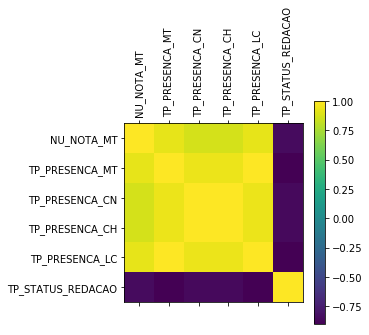

In [13]:
correlations_plot(dftrain, ['NU_NOTA_MT', 'TP_PRESENCA_MT', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_STATUS_REDACAO'])

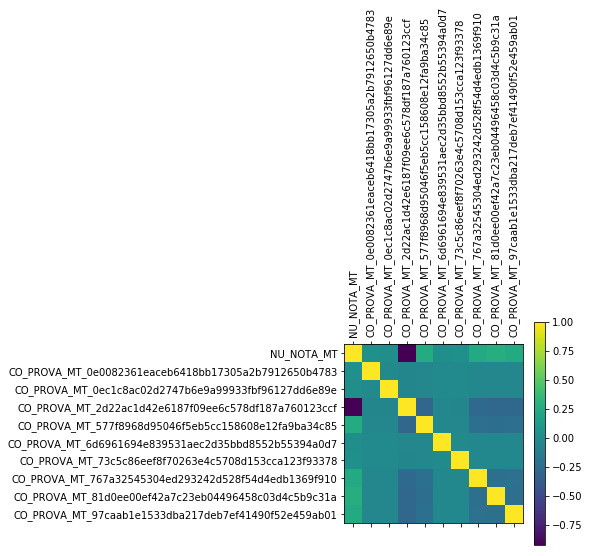

In [14]:
correlations_plot(dftrain, ['NU_NOTA_MT', 'CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783', 
                            'CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e', 
                            'CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf', 
                            'CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85', 
                            'CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7', 
                            'CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378', 
                            'CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910', 
                            'CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a', 
                            'CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01'])

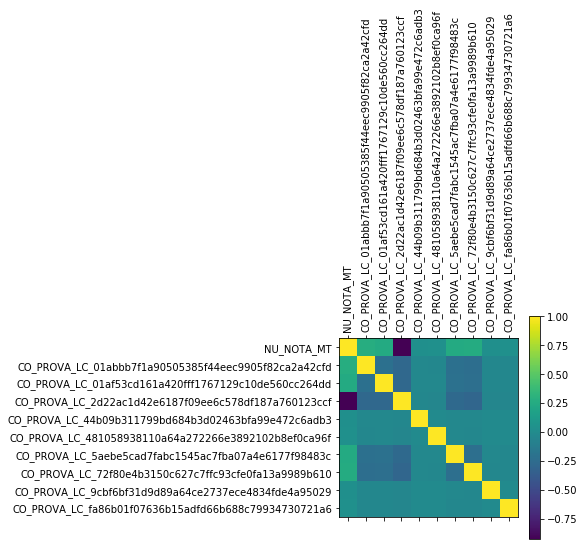

In [15]:
correlations_plot(dftrain, ['NU_NOTA_MT','CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd', 
                            'CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd', 
                            'CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf', 
                            'CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3', 
                            'CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f', 
                            'CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c', 
                            'CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610', 
                            'CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029', 
                            'CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6'])

In [16]:
dftrain[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO','TP_PRESENCA_MT',
         'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_STATUS_REDACAO']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 10 columns):
NU_NOTA_MT           13730 non-null float64
NU_NOTA_CN           13730 non-null float64
NU_NOTA_CH           13730 non-null float64
NU_NOTA_LC           13730 non-null float64
NU_NOTA_REDACAO      13730 non-null float64
TP_PRESENCA_MT       13730 non-null int64
TP_PRESENCA_CN       13730 non-null int64
TP_PRESENCA_CH       13730 non-null int64
TP_PRESENCA_LC       13730 non-null int64
TP_STATUS_REDACAO    13730 non-null float64
dtypes: float64(6), int64(4)
memory usage: 1.0 MB


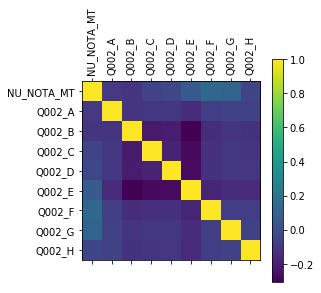

In [17]:
correlations_plot(cdf, ['NU_NOTA_MT','Q002_A', 'Q002_B', 'Q002_C', 'Q002_D', 'Q002_E', 'Q002_F', 'Q002_G', 'Q002_H'])

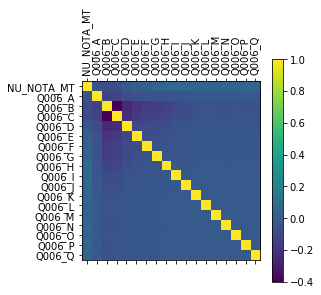

In [18]:
correlations_plot(cdf, ['NU_NOTA_MT', 'Q006_A', 'Q006_B', 'Q006_C', 'Q006_D', 'Q006_E', 'Q006_F', 'Q006_G', 'Q006_H', 'Q006_I', 'Q006_J', 'Q006_K', 'Q006_L', 'Q006_M','Q006_N', 'Q006_O', 'Q006_P', 'Q006_Q'])

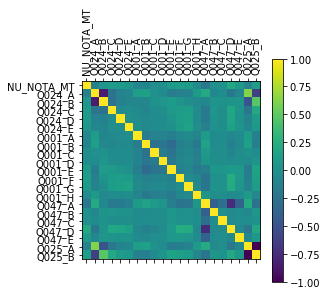

In [19]:
correlations_plot(dftrain, ['NU_NOTA_MT', 'Q024_A', 'Q024_B', 'Q024_C', 'Q024_D', 'Q024_E', 'Q001_A', 'Q001_B', 'Q001_C', 'Q001_D', 'Q001_E', 'Q001_F', 'Q001_G', 'Q001_H', 'Q047_A', 'Q047_B', 'Q047_C', 'Q047_D', 'Q047_E', 'Q025_A', 'Q025_B'])

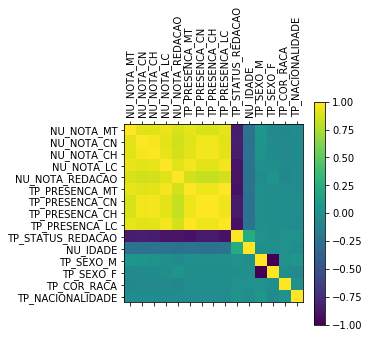

In [20]:
correlations_plot(dftrain, ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'TP_PRESENCA_MT',
                            'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_STATUS_REDACAO',
                           'NU_IDADE', 'TP_SEXO_M', 'TP_SEXO_F','TP_COR_RACA', 'TP_NACIONALIDADE'])

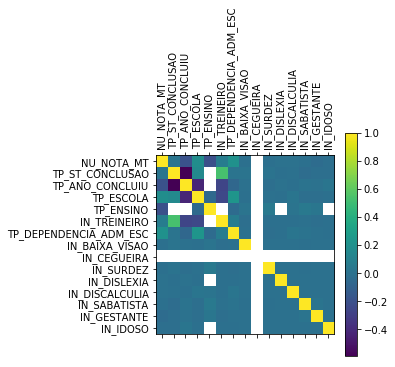

In [21]:
correlations_plot(dftrain, ['NU_NOTA_MT', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 
                            'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 
                            'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO'])

In [22]:
cdf.drop(['TP_ENSINO'], axis=1, inplace=True)

In [23]:
print(cdf[(cdf['TP_PRESENCA_MT']==1) & 
    (cdf['TP_PRESENCA_CN']==1) & 
    (cdf['TP_PRESENCA_CH']==1) & 
    (cdf['TP_PRESENCA_LC']==1)].NU_NOTA_MT.mean())


print(cdf[(cdf['TP_PRESENCA_MT']==0) | 
    (cdf['TP_PRESENCA_CN']==0) | 
    (cdf['TP_PRESENCA_CH']==0) | 
    (cdf['TP_PRESENCA_LC']==0)].NU_NOTA_MT.mean())

482.6486382093676
4.362290118359482


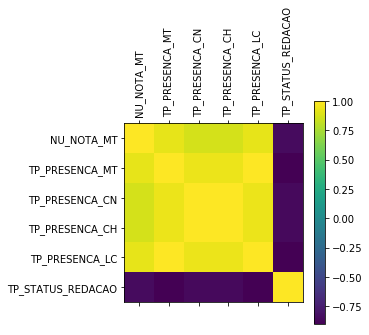

In [24]:
correlations_plot(dftrain, ['NU_NOTA_MT', 'TP_PRESENCA_MT','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_STATUS_REDACAO'])

In [25]:
XFeatures = list(cdf.columns)
XFeatures.remove('NU_NOTA_MT')

#XFeatures = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO','TP_ESCOLA',
#            'NU_IDADE','TP_PRESENCA_MT','TP_PRESENCA_CN','TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_DEPENDENCIA_ADM_ESC',
#           'TP_SEXO_F', 'TP_SEXO_M',
#            'Q024_A', 'Q024_B', 'Q024_C', 'Q024_D', 'Q024_E', 'Q001_A', 'Q001_B', 'Q001_C', 'Q001_D', 'Q001_E', 'Q001_F', 
#             'Q001_G', 'Q001_H', 'Q047_A', 'Q047_B', 'Q047_C', 'Q047_D', 'Q047_E', 'Q025_A', 'Q025_B'] #4290.47
X = cdf[XFeatures]
y = cdf['NU_NOTA_MT']

train_data, test_data, train_label, test_label = train_test_split(X, y, test_size=0.25, shuffle=False)

pred = scikitlearn_regression(test_data)

pred[pred['NU_NOTA_MT'] < 200] = 0


statistic(pred)

Cross validation score:  0.9195094771975312
Coefficients: 
 [-7.02208413e+01  4.31714983e+00  9.10059429e+10 -1.48215212e+01
 -7.73827976e+11  1.85993512e-01 -7.44050231e-01 -9.10059432e+10
  3.29492028e+00  2.12768555e-01 -3.54149792e+00 -7.73827976e+11
  4.36035156e-01  7.73827976e+11  9.81204987e-01  2.42691040e-02
  1.57435750e+01 -7.73827976e+11 -1.50080109e+00 -7.61604309e-01
 -7.73827976e+11 -7.73827976e+11 -2.34288430e+00  1.28412574e+09
 -2.71238327e-01 -2.60410705e+01 -9.30501938e-01  1.25569153e+00
 -1.66168213e-02  1.64852380e+09 -3.54013581e+08  4.94828421e+09
  2.45541661e+09  2.45541662e+09  2.45541661e+09  9.21141621e+07
  9.21141639e+07  9.21141632e+07  9.21141648e+07  9.21141714e+07
 -2.94756929e+09 -2.94756929e+09 -2.94756929e+09 -2.94756929e+09
 -2.94756929e+09 -2.94756928e+09 -2.94756929e+09 -2.94756929e+09
 -3.43616967e+09 -7.08415610e+09  7.83883288e+09 -2.04465499e+09
 -1.99184232e+09 -2.55636759e+09 -1.67466526e+09 -2.13914987e+09
 -2.21427857e+09 -9.46353887e+

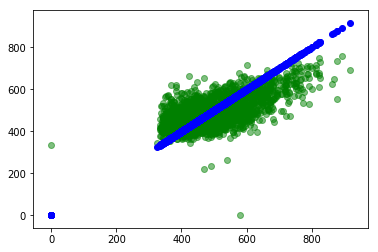

In [26]:
plt.scatter(test_label, pred, c='green', alpha=0.5)
plt.scatter(test_label, test_label, c='blue')
plt.show()

In [27]:
#Resultado
fillTP_DEPENDENCIA_ADM_ESC(dftest)
preprocess_data(dftest, False)
preprocess_data_corr(dftest, False)

result = scikitlearn_regression(dftest[XFeatures])

result[result['NU_NOTA_MT'] < 200] = 0
for idx in range(len(dftest)):
    if dftest.TP_PRESENCA_MT.iloc[idx] == 0:
        result.iloc[idx, result.columns.get_loc('NU_NOTA_MT')] = 0

answer['NU_NOTA_MT'] = result.NU_NOTA_MT
answer.to_csv('answer.csv', index=False)

Cross validation score:  0.9195094771975312
Coefficients: 
 [-7.02208413e+01  4.31714983e+00  9.10059429e+10 -1.48215212e+01
 -7.73827976e+11  1.85993512e-01 -7.44050231e-01 -9.10059432e+10
  3.29492028e+00  2.12768555e-01 -3.54149792e+00 -7.73827976e+11
  4.36035156e-01  7.73827976e+11  9.81204987e-01  2.42691040e-02
  1.57435750e+01 -7.73827976e+11 -1.50080109e+00 -7.61604309e-01
 -7.73827976e+11 -7.73827976e+11 -2.34288430e+00  1.28412574e+09
 -2.71238327e-01 -2.60410705e+01 -9.30501938e-01  1.25569153e+00
 -1.66168213e-02  1.64852380e+09 -3.54013581e+08  4.94828421e+09
  2.45541661e+09  2.45541662e+09  2.45541661e+09  9.21141621e+07
  9.21141639e+07  9.21141632e+07  9.21141648e+07  9.21141714e+07
 -2.94756929e+09 -2.94756929e+09 -2.94756929e+09 -2.94756929e+09
 -2.94756929e+09 -2.94756928e+09 -2.94756929e+09 -2.94756929e+09
 -3.43616967e+09 -7.08415610e+09  7.83883288e+09 -2.04465499e+09
 -1.99184232e+09 -2.55636759e+09 -1.67466526e+09 -2.13914987e+09
 -2.21427857e+09 -9.46353887e+